<a href="https://colab.research.google.com/github/Siddhi-Sovle/Data-Science/blob/main/Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
df = pd.read_csv("/content/CreditCardData.csv")

In [3]:
df.head()

,Transaction ID,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,#3577 209,14-Oct-20,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,#3039 221,14-Oct-20,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,#2694 780,14-Oct-20,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,#2640 960,13-Oct-20,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,#2771 031,13-Oct-20,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Transaction ID          100000 non-null  object 
 1   Date                    100000 non-null  object 
 2   Day of Week             100000 non-null  object 
 3   Time                    100000 non-null  int64  
 4   Type of Card            100000 non-null  object 
 5   Entry Mode              100000 non-null  object 
 6   Amount                  99994 non-null   object 
 7   Type of Transaction     100000 non-null  object 
 8   Merchant Group          99990 non-null   object 
 9   Country of Transaction  100000 non-null  object 
 10  Shipping Address        99995 non-null   object 
 11  Country of Residence    100000 non-null  object 
 12  Gender                  99996 non-null   object 
 13  Age                     100000 non-null  float64
 14  Bank                 

In [5]:
df = df.dropna()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99977 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Transaction ID          99977 non-null  object 
 1   Date                    99977 non-null  object 
 2   Day of Week             99977 non-null  object 
 3   Time                    99977 non-null  int64  
 4   Type of Card            99977 non-null  object 
 5   Entry Mode              99977 non-null  object 
 6   Amount                  99977 non-null  object 
 7   Type of Transaction     99977 non-null  object 
 8   Merchant Group          99977 non-null  object 
 9   Country of Transaction  99977 non-null  object 
 10  Shipping Address        99977 non-null  object 
 11  Country of Residence    99977 non-null  object 
 12  Gender                  99977 non-null  object 
 13  Age                     99977 non-null  float64
 14  Bank                    99977 non-null  obj

In [7]:
df.duplicated().sum()

0

In [8]:
for i in df.columns:
  print(i)
  print(df[i].value_counts())
  print(" ")

Transaction ID
Transaction ID
#2547 017    5
#2617 708    4
#2748 710    3
#3603 721    3
#3567 660    3
            ..
#2844 374    1
#2557 633    1
#3316 605    1
#2889 615    1
#3107 092    1
Name: count, Length: 95657, dtype: int64
 
Date
Date
14-Oct-20    50173
13-Oct-20    49802
16-Oct-20        1
15-Oct-20        1
Name: count, dtype: int64
 
Day of Week
Day of Week
Wednesday    50166
Tuesday      49785
Friday          14
Thursday        12
Name: count, dtype: int64
 
Time
Time
13    5807
16    5785
12    5754
23    5750
11    5747
7     5715
14    5684
8     5683
15    5681
21    5681
17    5663
22    5622
19    5622
10    5609
9     5569
18    5547
20    5521
2      536
3      531
6      515
0      509
5      488
1      483
4      474
24       1
Name: count, dtype: int64
 
Type of Card
Type of Card
Visa          53800
MasterCard    46177
Name: count, dtype: int64
 
Entry Mode
Entry Mode
PIN    49966
CVC    33470
Tap    16541
Name: count, dtype: int64
 
Amount
Amount
£17     21

In [9]:
int_cols = df.select_dtypes(include=['int64'])

# Calculate the correlation matrix for integer columns
corr_matrix = int_cols.corr()
corr_matrix

,Time,Fraud
Time,1.000000,-0.286283
Fraud,-0.286283,1.000000


In [10]:
df = df.drop(['Transaction ID'], axis=1)

In [11]:
df.columns

Index(['Date', 'Day of Week', 'Time', 'Type of Card', 'Entry Mode', 'Amount',
       'Type of Transaction', 'Merchant Group', 'Country of Transaction',
       'Shipping Address', 'Country of Residence', 'Gender', 'Age', 'Bank',
       'Fraud'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0f33b1cca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0f33b1d1e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0f33b1ca00>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0f33b1d720>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0f33b1d9c0>],
 'means': []}

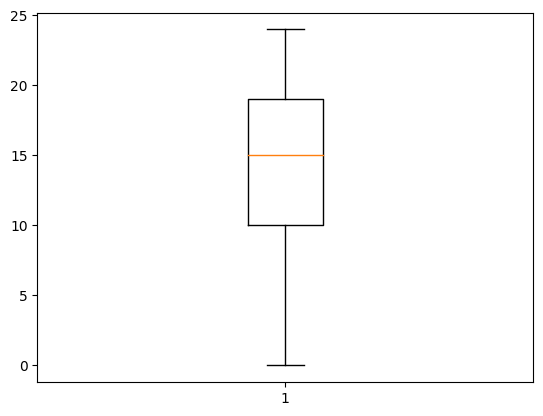

In [12]:
plt.boxplot(df['Time'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0f33a442e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0f33b1dd50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0f33a0bfa0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0f33a447c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0f33a44a60>],
 'means': []}

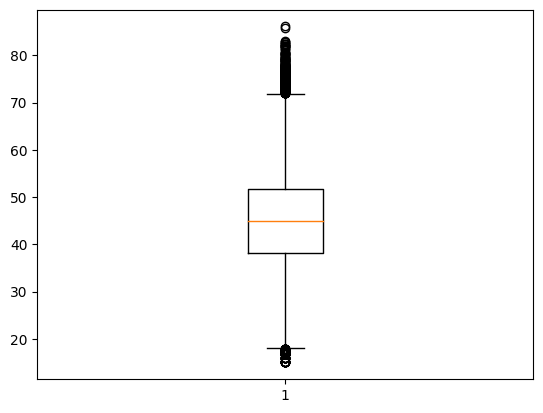

In [13]:
plt.boxplot(df['Age'])

In [14]:

Q3 = df['Age'].quantile(q=0.75)
Q1 = df['Age'].quantile(q=0.25)
IQR = Q3 - Q1
up = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR


import numpy as np

def cap_extreme_values(data, lower_bound, upper_bound):
    capped_data = np.clip(data, lower_bound, upper_bound)
    return capped_data

df['Age'] = cap_extreme_values(df['Age'], low, up)


{'whiskers': [<matplotlib.lines.Line2D at 0x7c0f33893880>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0f33893dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0f338935e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0f338c8340>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0f338c85e0>],
 'means': []}

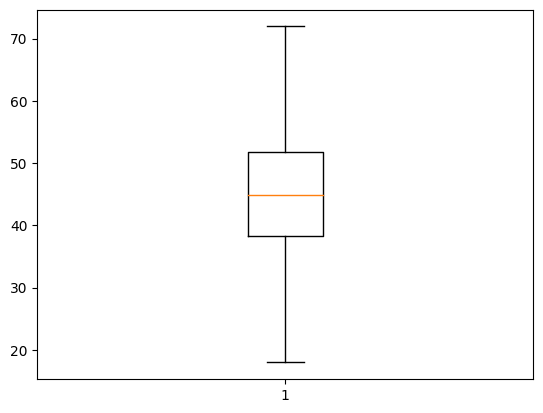

In [15]:
plt.boxplot(df['Age'])

#**UNIVARIATE ANALYSIS**

<ipython-input-16-c3dc5491241c>:11: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


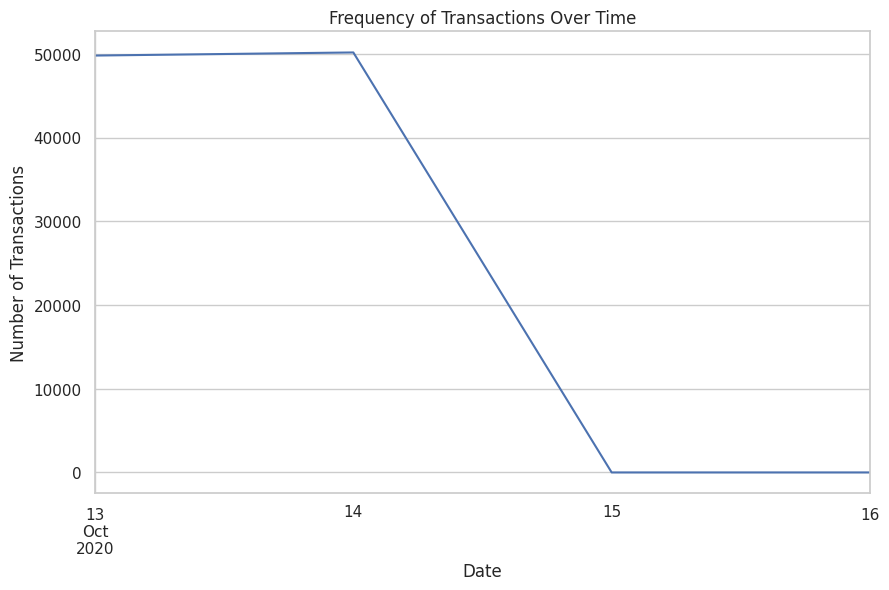

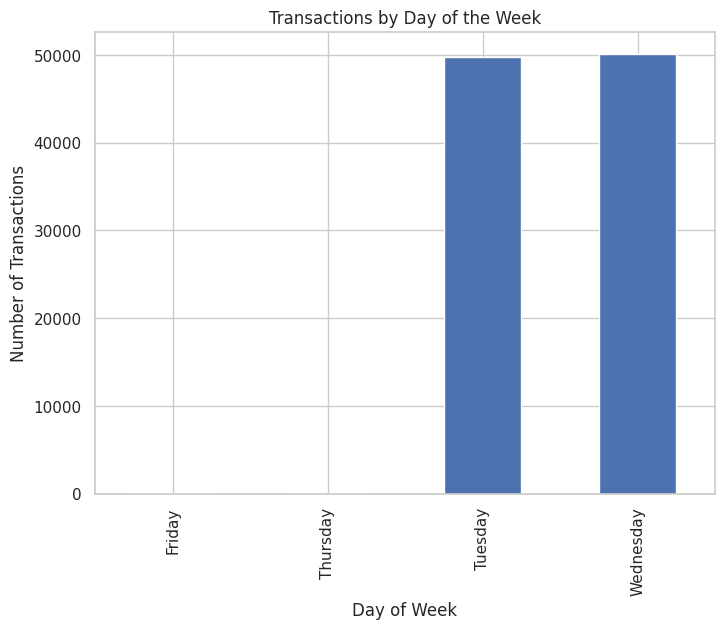

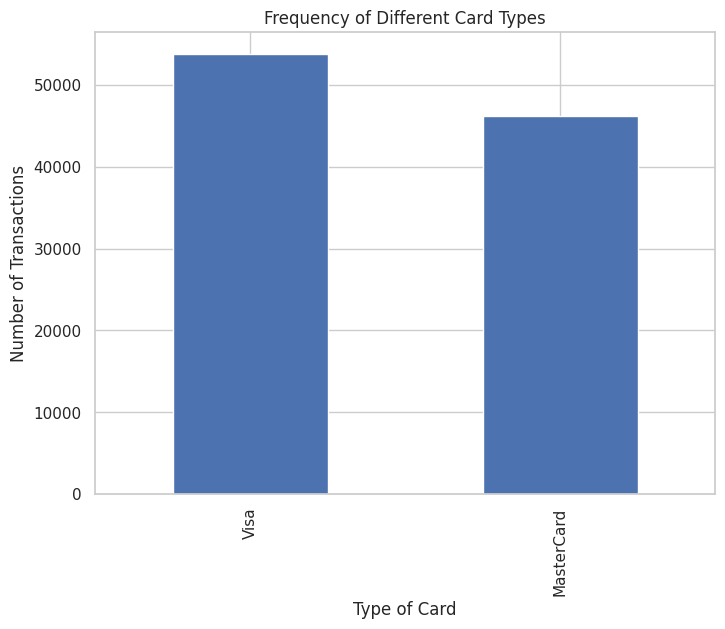

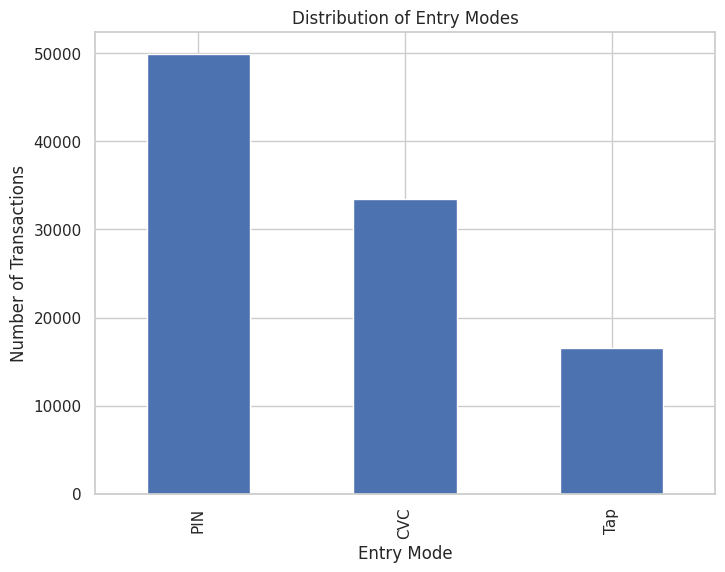

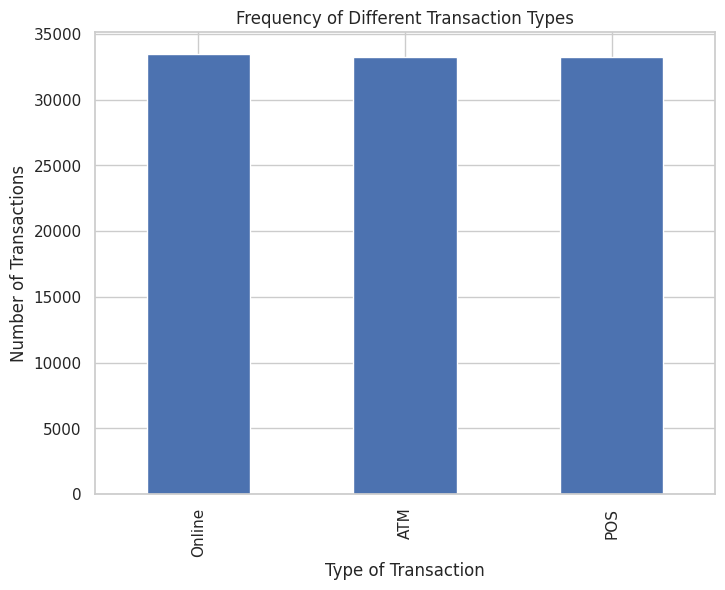

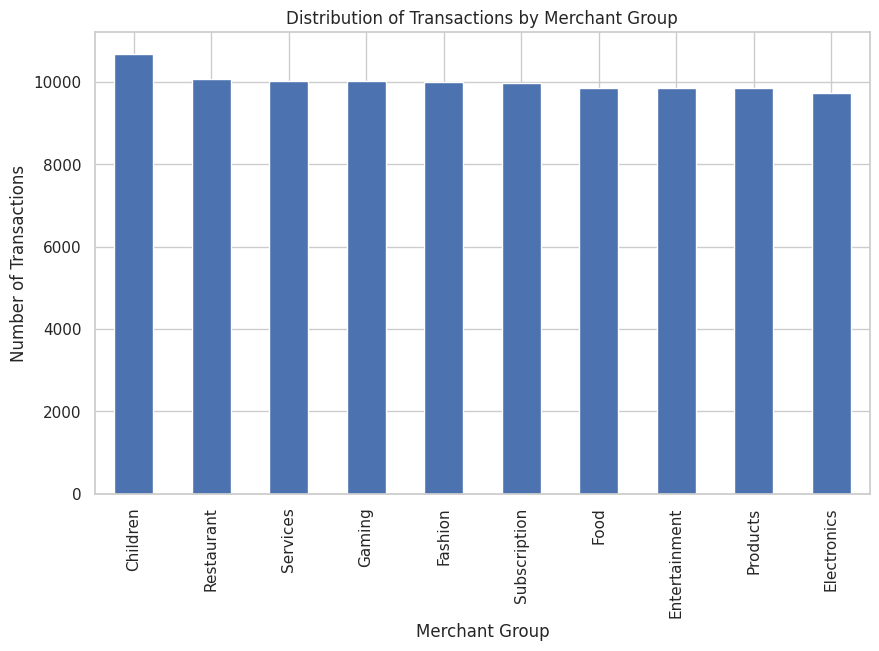

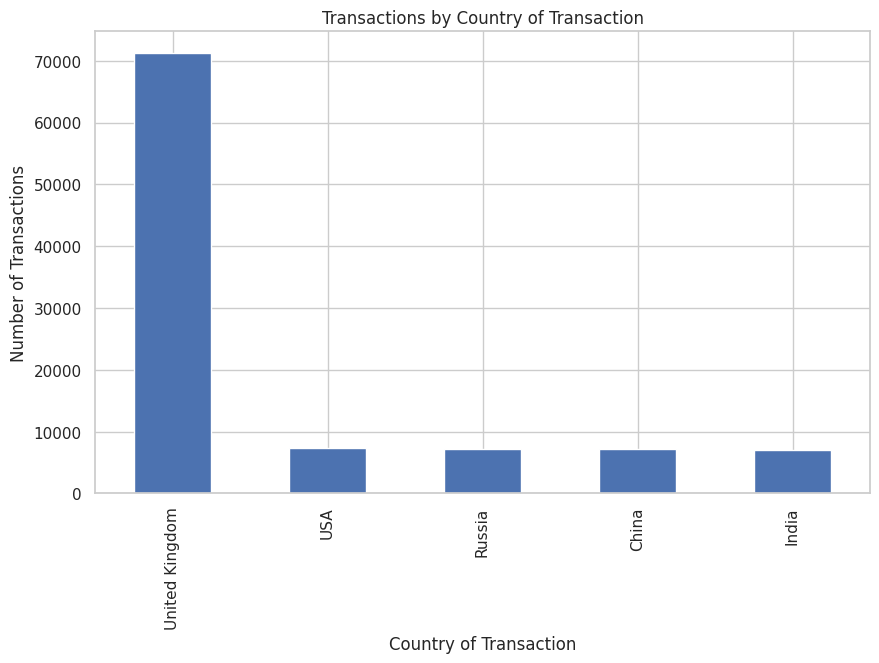

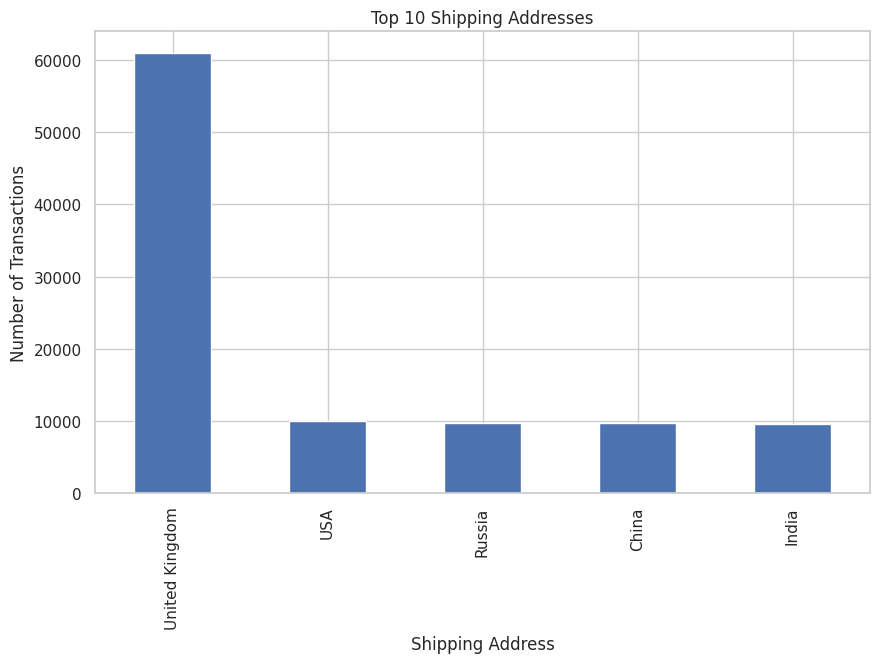

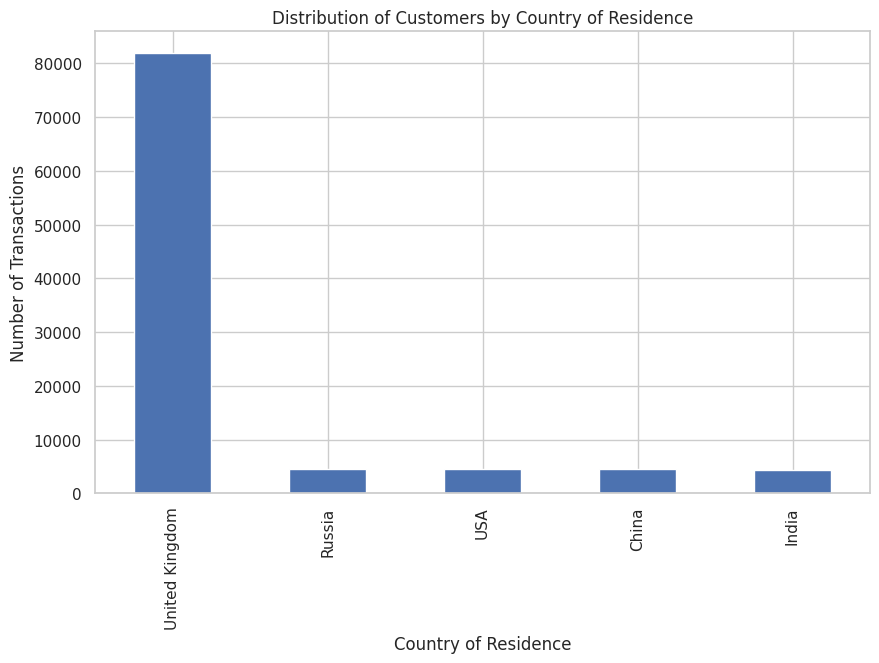

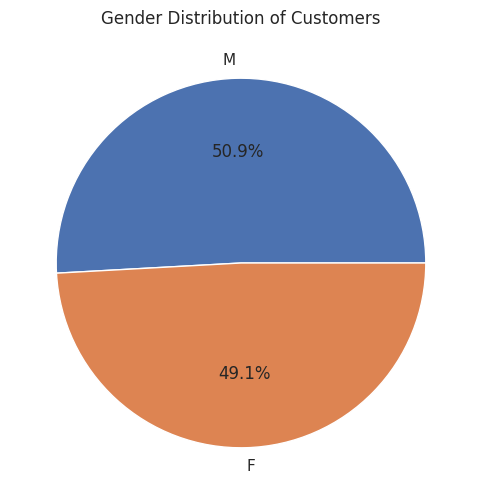

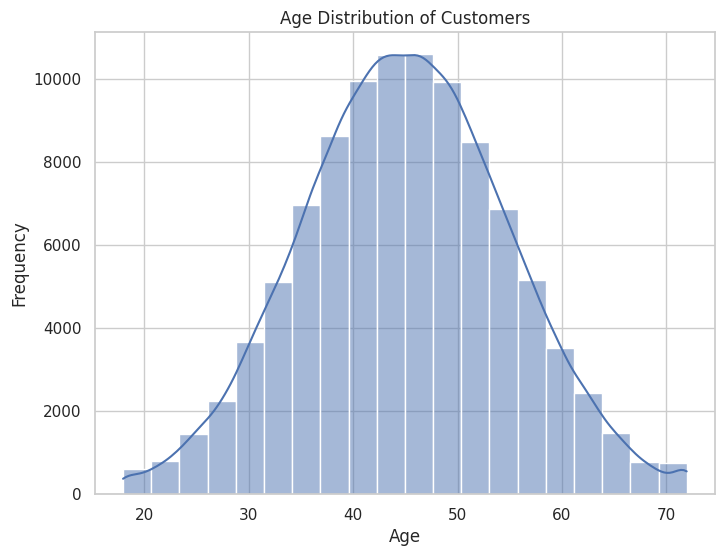

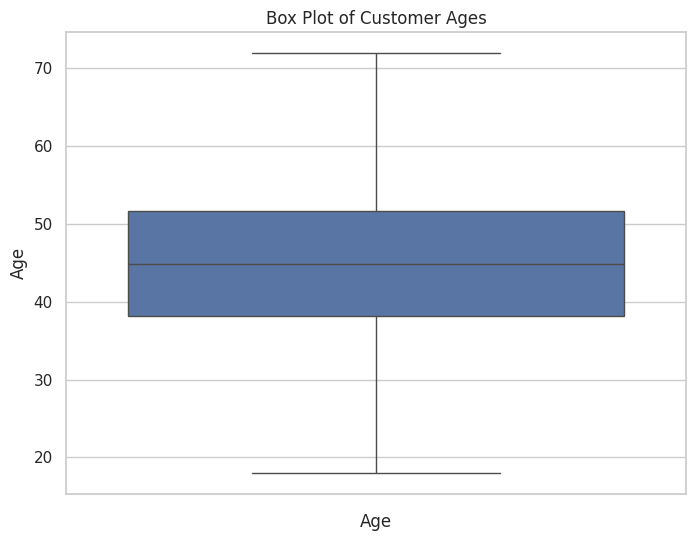

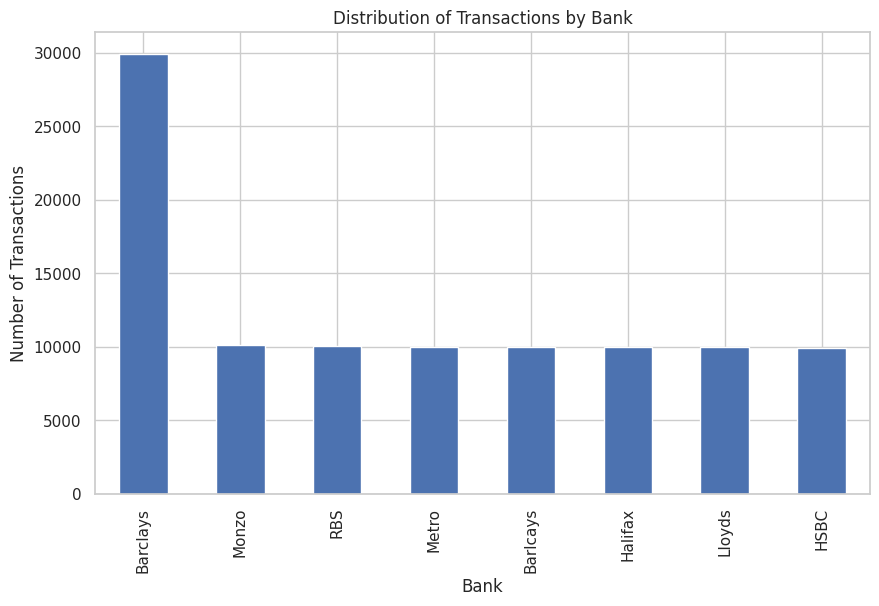

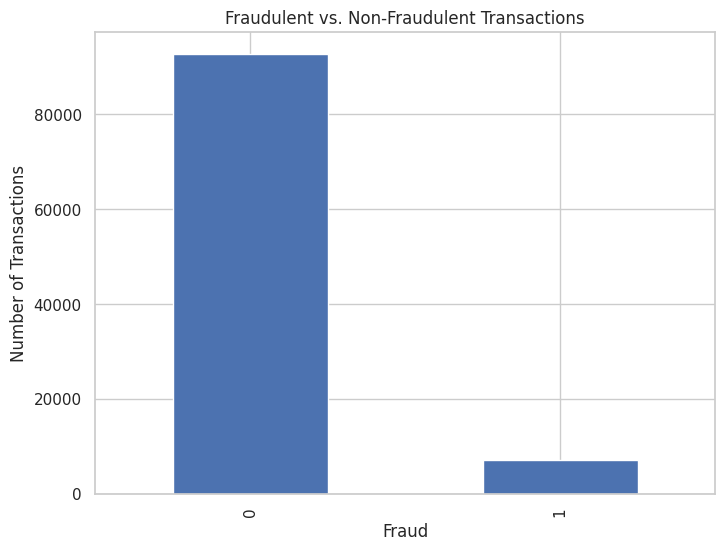

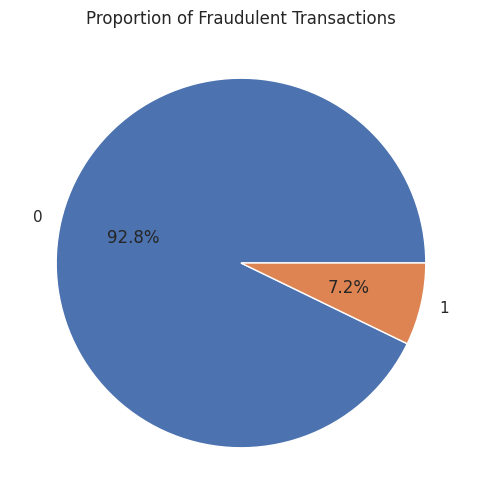

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame
# Ensure seaborn styles are set
sns.set(style="whitegrid")

# Date: Line plot or histogram
plt.figure(figsize=(10, 6))
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].value_counts().sort_index().plot(kind='line')
plt.title('Frequency of Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

# Day of Week: Bar plot
plt.figure(figsize=(8, 6))
df['Day of Week'].value_counts().sort_index().plot(kind='bar')
plt.title('Transactions by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()


# Type of Card: Bar plot
plt.figure(figsize=(8, 6))
df['Type of Card'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Card Types')
plt.xlabel('Type of Card')
plt.ylabel('Number of Transactions')
plt.show()

# Entry Mode: Bar plot
plt.figure(figsize=(8, 6))
df['Entry Mode'].value_counts().plot(kind='bar')
plt.title('Distribution of Entry Modes')
plt.xlabel('Entry Mode')
plt.ylabel('Number of Transactions')
plt.show()


# Type of Transaction: Bar plot
plt.figure(figsize=(8, 6))
df['Type of Transaction'].value_counts().plot(kind='bar')
plt.title('Frequency of Different Transaction Types')
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')
plt.show()

# Merchant Group: Bar plot
plt.figure(figsize=(10, 6))
df['Merchant Group'].value_counts().plot(kind='bar')
plt.title('Distribution of Transactions by Merchant Group')
plt.xlabel('Merchant Group')
plt.ylabel('Number of Transactions')
plt.show()

# Country of Transaction: Bar plot or map visualization
plt.figure(figsize=(10, 6))
df['Country of Transaction'].value_counts().plot(kind='bar')
plt.title('Transactions by Country of Transaction')
plt.xlabel('Country of Transaction')
plt.ylabel('Number of Transactions')
plt.show()

# Shipping Address: Bar plot or map visualization
# Assuming Shipping Address is categorical (e.g., country, city)
plt.figure(figsize=(10, 6))
df['Shipping Address'].value_counts().head(10).plot(kind='bar')  # Showing top 10 for simplicity
plt.title('Top 10 Shipping Addresses')
plt.xlabel('Shipping Address')
plt.ylabel('Number of Transactions')
plt.show()

# Country of Residence: Bar plot or map visualization
plt.figure(figsize=(10, 6))
df['Country of Residence'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers by Country of Residence')
plt.xlabel('Country of Residence')
plt.ylabel('Number of Transactions')
plt.show()

# Gender: Pie chart or bar plot
plt.figure(figsize=(8, 6))
df['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Gender Distribution of Customers')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()

# Age: Histogram or box plot
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['Age'])
plt.title('Box Plot of Customer Ages')
plt.xlabel('Age')
plt.show()

# Bank: Bar plot
plt.figure(figsize=(10, 6))
df['Bank'].value_counts().plot(kind='bar')
plt.title('Distribution of Transactions by Bank')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.show()

# Fraud: Bar plot or pie chart
plt.figure(figsize=(8, 6))
df['Fraud'].value_counts().plot(kind='bar')
plt.title('Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Fraud')
plt.ylabel('Number of Transactions')
plt.show()

# Alternative pie chart for Fraud
plt.figure(figsize=(8, 6))
df['Fraud'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Fraudulent Transactions')
plt.ylabel('')  # Hide y-label for pie chart
plt.show()


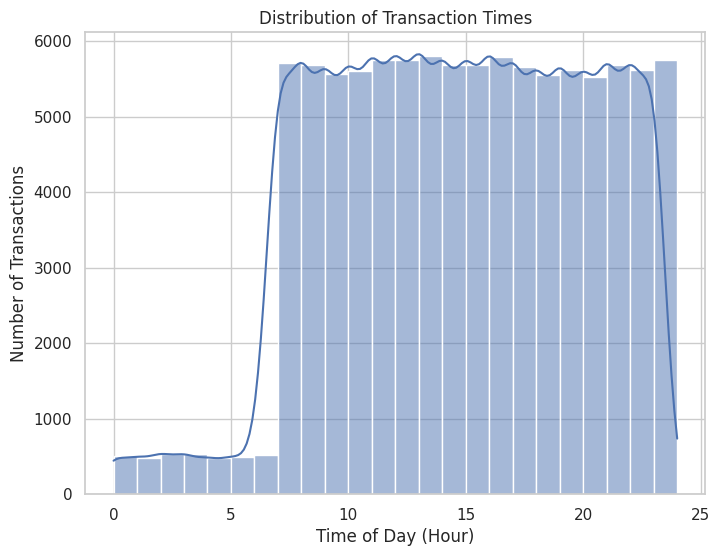

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Time'], kde=True, bins=24)
plt.title('Distribution of Transaction Times')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Number of Transactions')
plt.show()

#**BIVARIATE ANALYSIS**

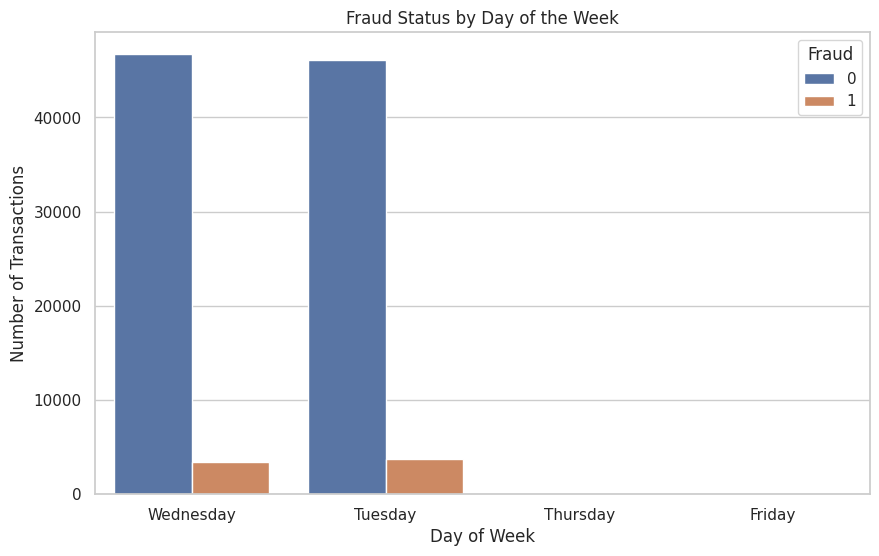

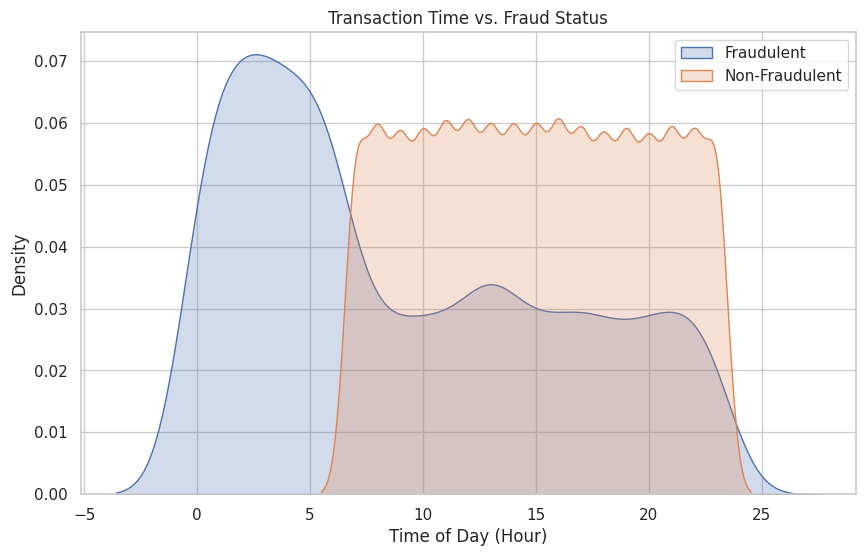

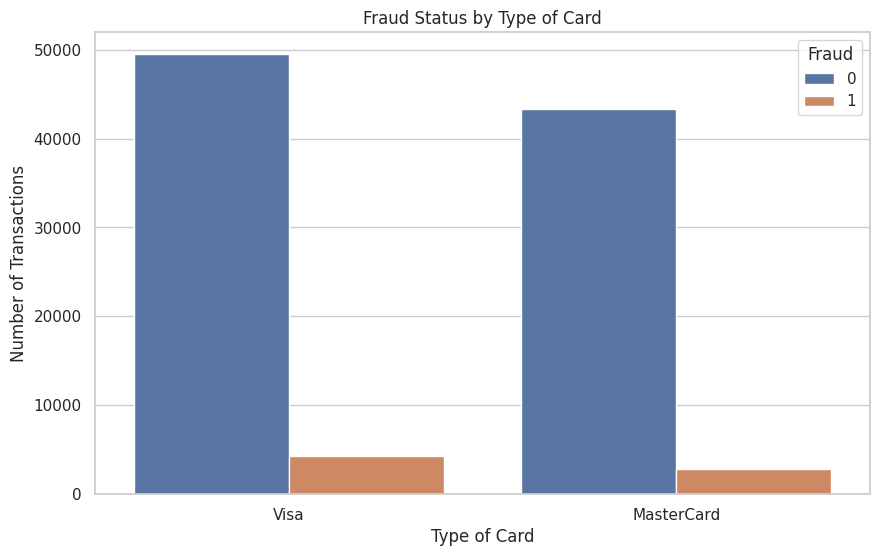

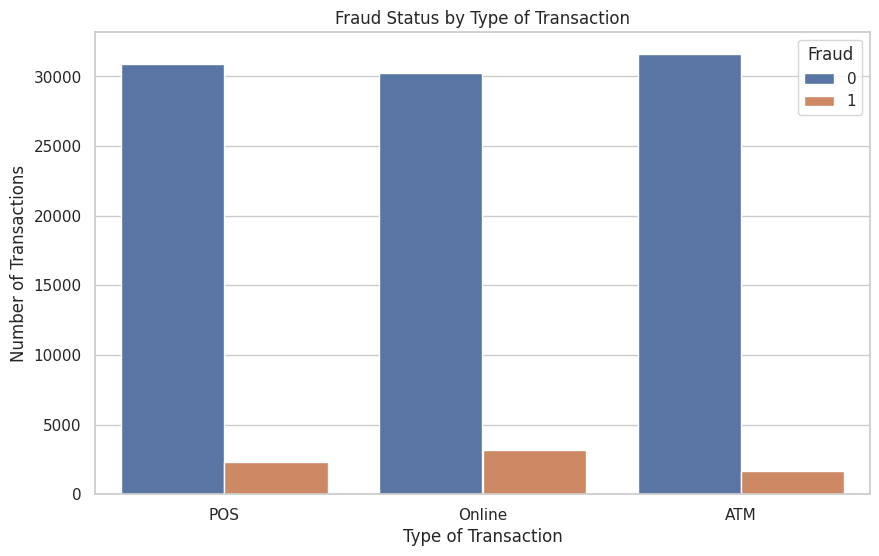

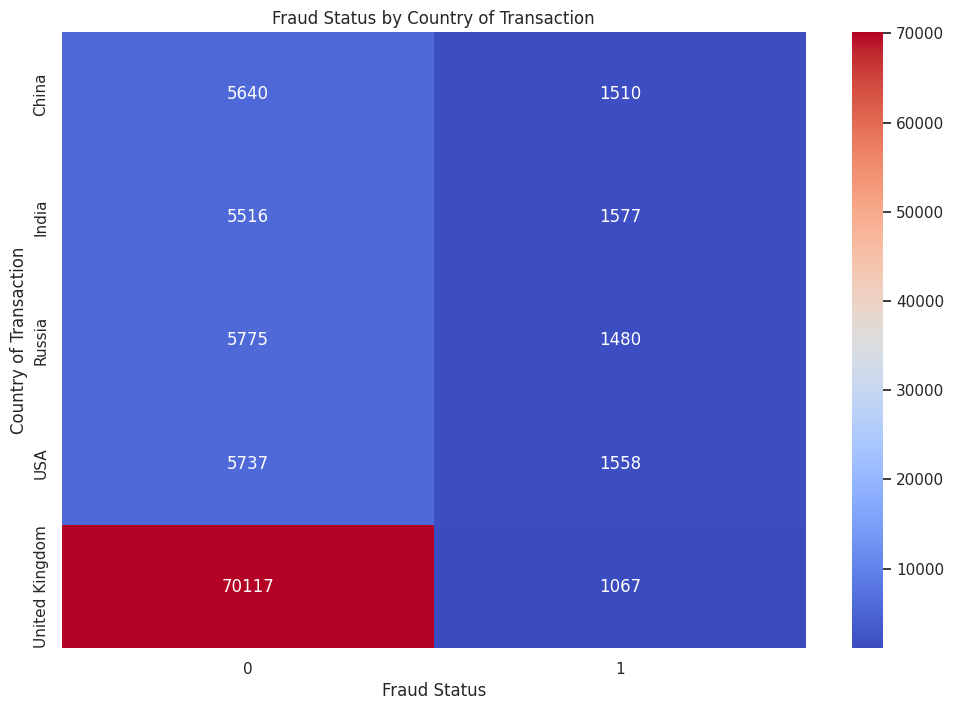

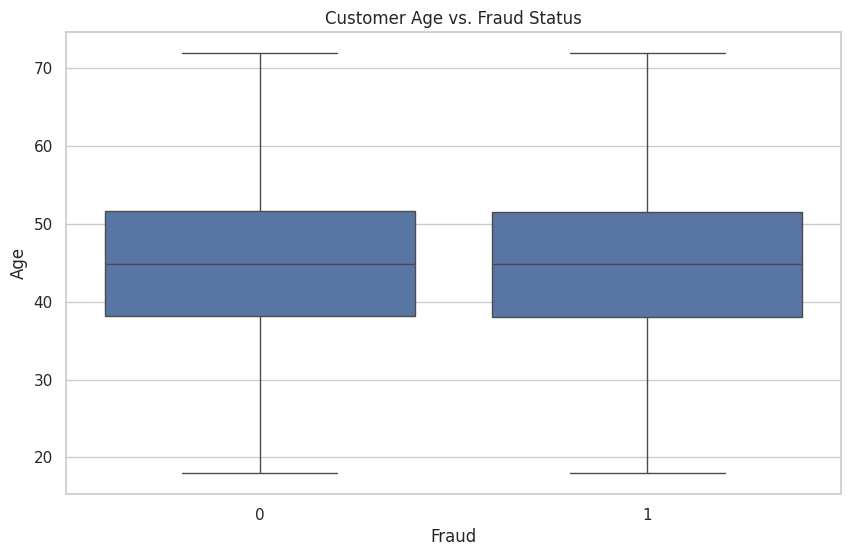

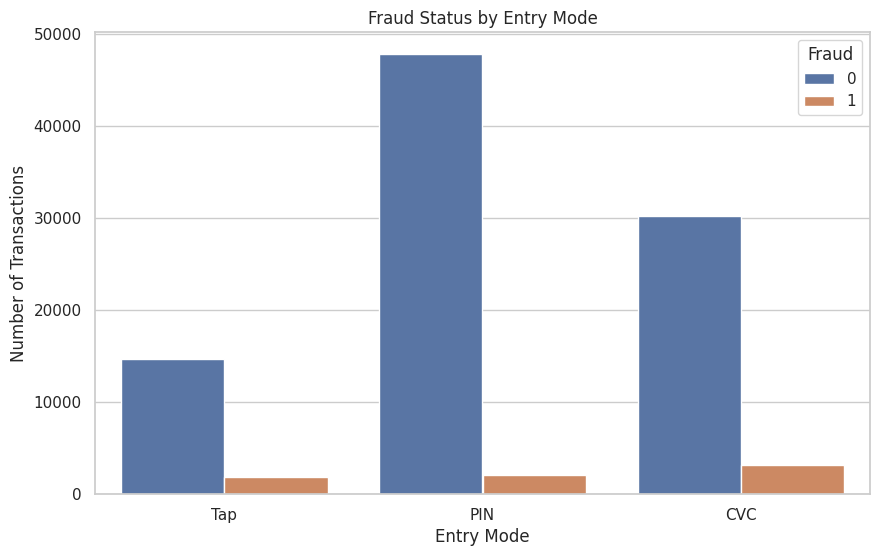

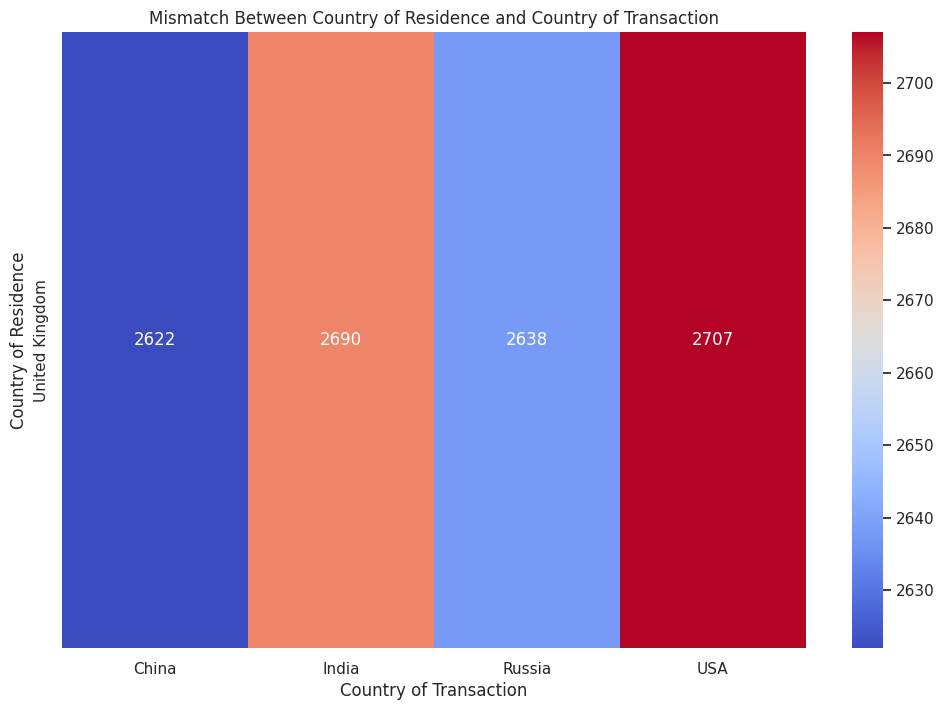

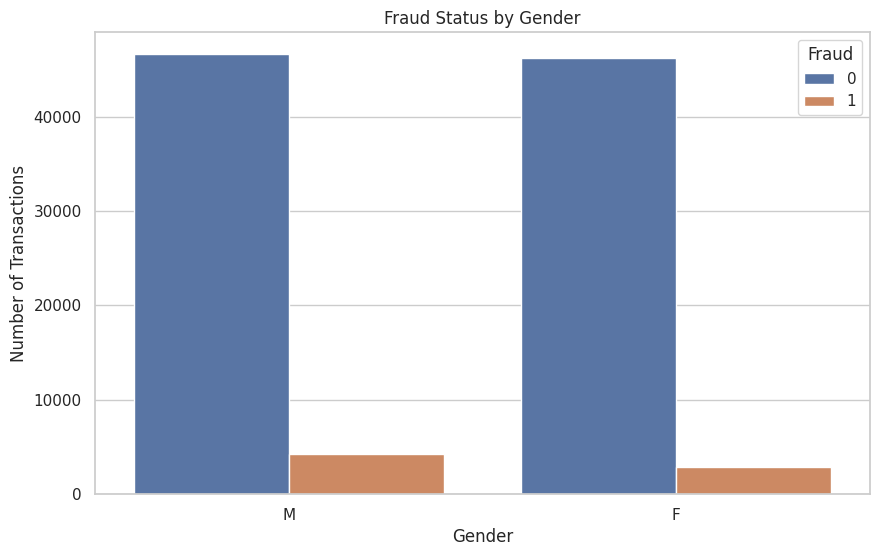

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Day of Week', hue='Fraud', data=df)
plt.title('Fraud Status by Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Fraud'] == 1]['Time'], label='Fraudulent', fill=True)
sns.kdeplot(data=df[df['Fraud'] == 0]['Time'], label='Non-Fraudulent', fill=True)
plt.title('Transaction Time vs. Fraud Status')
plt.xlabel('Time of Day (Hour)')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Card', hue='Fraud', data=df)
plt.title('Fraud Status by Type of Card')
plt.xlabel('Type of Card')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Type of Transaction', hue='Fraud', data=df)
plt.title('Fraud Status by Type of Transaction')
plt.xlabel('Type of Transaction')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(12, 8))
fraud_country = df.groupby(['Country of Transaction', 'Fraud']).size().unstack().fillna(0)
sns.heatmap(fraud_country, cmap='coolwarm', annot=True, fmt='g')
plt.title('Fraud Status by Country of Transaction')
plt.xlabel('Fraud Status')
plt.ylabel('Country of Transaction')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Fraud', y='Age', data=df)
plt.title('Customer Age vs. Fraud Status')
plt.xlabel('Fraud')
plt.ylabel('Age')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Entry Mode', hue='Fraud', data=df)
plt.title('Fraud Status by Entry Mode')
plt.xlabel('Entry Mode')
plt.ylabel('Number of Transactions')
plt.show()

plt.figure(figsize=(12, 8))
country_mismatch = df[df['Country of Residence'] != df['Country of Transaction']]
mismatch_count = country_mismatch.groupby(['Country of Residence', 'Country of Transaction']).size().unstack().fillna(0)
sns.heatmap(mismatch_count, cmap='coolwarm', annot=True, fmt='g')
plt.title('Mismatch Between Country of Residence and Country of Transaction')
plt.xlabel('Country of Transaction')
plt.ylabel('Country of Residence')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Fraud', data=df)
plt.title('Fraud Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Transactions')
plt.show()

<Axes: >

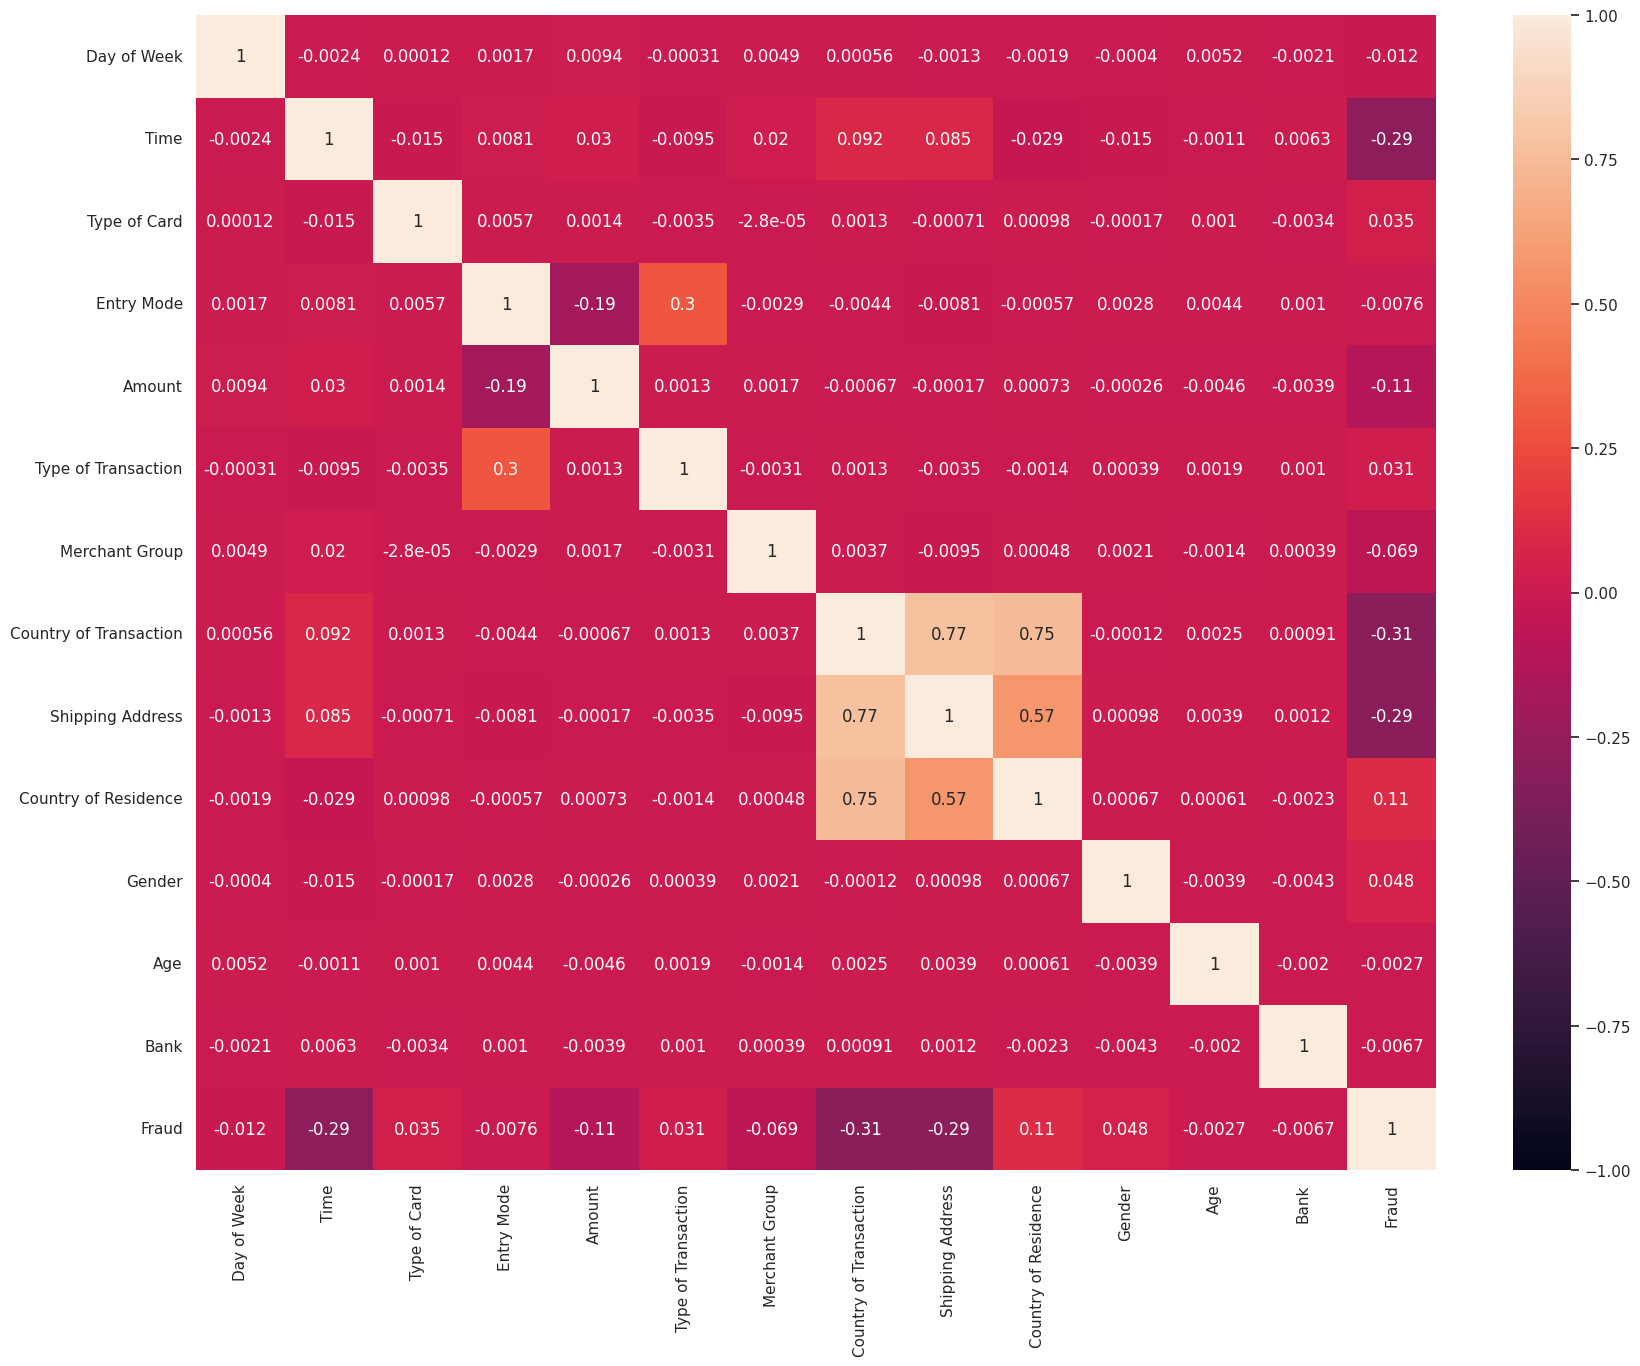

In [34]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

In [19]:
df.head()

,Date,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,2020-10-14,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,2020-10-14,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,2020-10-14,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,2020-10-13,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,2020-10-13,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


In [20]:
df = df.drop('Date', axis=1)

In [21]:
df.head()

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,Wednesday,19,Visa,Tap,£5,POS,Entertainment,United Kingdom,United Kingdom,United Kingdom,M,25.2,RBS,0
1,Wednesday,17,MasterCard,PIN,£288,POS,Services,USA,USA,USA,F,49.6,Lloyds,0
2,Wednesday,14,Visa,Tap,£5,POS,Restaurant,India,India,India,F,42.2,Barclays,0
3,Tuesday,14,Visa,Tap,£28,POS,Entertainment,United Kingdom,India,United Kingdom,F,51.0,Barclays,0
4,Tuesday,23,Visa,CVC,£91,Online,Electronics,USA,USA,United Kingdom,M,38.0,Halifax,1


#**FEATURE ENGINEERING**

In [22]:
df['Amount'] = df['Amount'].str.replace('£', '').str.strip()

# Convert the column to numeric (float or int)
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [23]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Day of Week'] = label_encoder.fit_transform(df['Day of Week'])
df['Type of Card'] = label_encoder.fit_transform(df['Type of Card'])
df['Entry Mode'] = label_encoder.fit_transform(df['Entry Mode'])
df['Type of Transaction'] = label_encoder.fit_transform(df['Type of Transaction'])
df['Merchant Group'] = label_encoder.fit_transform(df['Merchant Group'])
df['Country of Transaction'] = label_encoder.fit_transform(df['Country of Transaction'])
df['Shipping Address'] = label_encoder.fit_transform(df['Shipping Address'])
df['Country of Residence'] = label_encoder.fit_transform(df['Country of Residence'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Shipping Address'] = label_encoder.fit_transform(df['Shipping Address'])
df['Bank'] = label_encoder.fit_transform(df['Bank'])

In [24]:
df.head()

,Day of Week,Time,Type of Card,Entry Mode,Amount,Type of Transaction,Merchant Group,Country of Transaction,Shipping Address,Country of Residence,Gender,Age,Bank,Fraud
0,3,19,1,2,5,2,2,4,4,4,1,25.2,7,0
1,3,17,0,1,288,2,8,3,3,3,0,49.6,4,0
2,3,14,1,2,5,2,7,1,1,1,0,42.2,0,0
3,2,14,1,2,28,2,2,4,1,4,0,51.0,0,0
4,2,23,1,0,91,1,1,3,3,4,1,38.0,3,1


#**MODEL BUILDING**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [41]:
X = df.drop('Fraud', axis=1)
Y = df['Fraud']

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [43]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
model.score(X_train, Y_train)

0.9566609033622451

In [45]:
model.score(X_test, Y_test)

0.9560578782423151

In [46]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [47]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(Y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     64974
           1       0.77      0.56      0.65      5009

    accuracy                           0.96     69983
   macro avg       0.87      0.77      0.81     69983
weighted avg       0.95      0.96      0.95     69983



In [48]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(Y_test, y_pred_test)
logit_roc_auc

0.7694615178862664

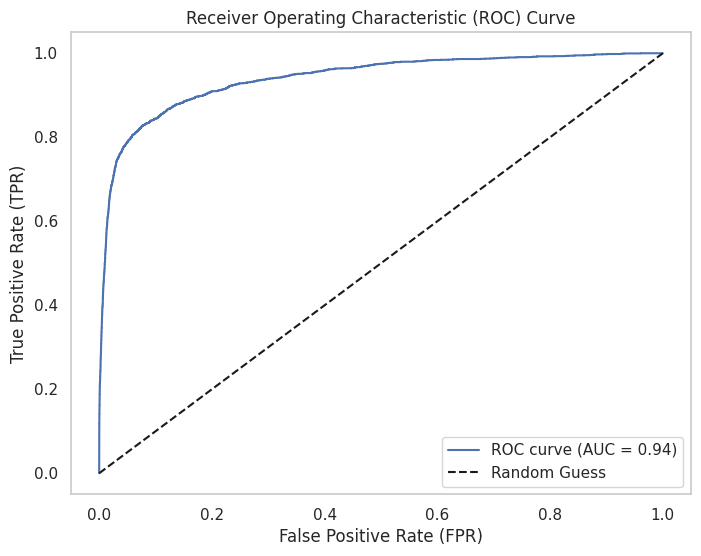

In [49]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [50]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=10)
tree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [51]:
tree.score(X_train,Y_train)

0.9871540231199005

In [52]:
tree.score(X_test,Y_test)

0.9842635193705408

In [53]:
y_pred_train = tree.predict(X_train)
y_pred_test = tree.predict(X_test)

In [54]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(Y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     64974
           1       0.98      0.84      0.90      5009

    accuracy                           0.99     69983
   macro avg       0.98      0.92      0.95     69983
weighted avg       0.99      0.99      0.99     69983



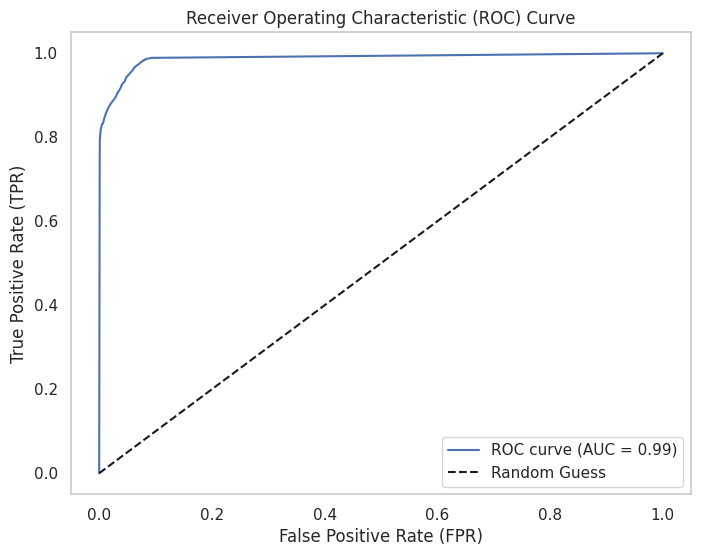

In [55]:
y_prob = tree.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [60]:
#KNN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [61]:
sc = StandardScaler()
X_train_Scaled = sc.fit_transform(X_train)
X_test_Scaled = sc.transform(X_test)

In [62]:
knn = KNeighborsClassifier(n_neighbors=5,weights='uniform',metric='euclidean')
knn.fit(X_train_Scaled, Y_train)

KNeighborsClassifier(metric='euclidean')

In [63]:
knn.score(X_train_Scaled, Y_train)

0.9752654216023892

In [64]:
knn.score(X_test_Scaled, Y_test)

0.9666266586650664

In [66]:
y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [67]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(Y_train, y_pred_train ))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     64974
           1       0.00      0.00      0.00      5009

    accuracy                           0.93     69983
   macro avg       0.46      0.50      0.48     69983
weighted avg       0.86      0.93      0.89     69983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


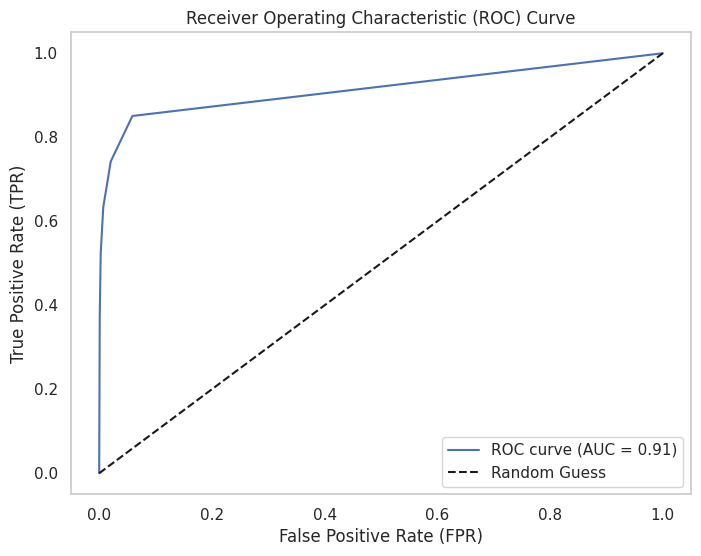

In [70]:
y_prob = knn.predict_proba(X_test_Scaled)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [71]:
results = pd.DataFrame(dtype='int', columns=[['Train_Accuracy', 'Test_Accuracy', 'AUC-Score']], index=['LogisticReg', 'DecisionTreeClassifier', 'KNN'])

In [72]:
results['Train_Accuracy'] = ['0.95','0.98','0.97']
results['Test_Accuracy'] = ['0.95','0.98','0.96']
results['AUC-Score'] = ['0.94','0.99','0.91']

In [74]:
results

,Train_Accuracy,Test_Accuracy,AUC-Score
LogisticReg,0.95,0.95,0.94
DecisionTreeClassifier,0.98,0.98,0.99
KNN,0.97,0.96,0.91


#Comparing the Train_Accuracy, Test_Accuracy and AUC-Score, we found that DecisionTreeClassifier is the best model.